In [62]:
import pandas as pd

train = pd.read_csv('data/train_users_2.csv')
age_gender = pd.read_csv('data/age_gender_bkts.csv')
countries = pd.read_csv('data/countries.csv')
sess = pd.read_csv('data/sessions.csv')
test = pd.read_csv('data/test_users.csv')

In [63]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


age_gender.head()

In [65]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [9]:
sess.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [116]:
print 'Train data shape', train.shape
print 'Age Gender shape', age_gender.shape
print 'Countries Shape', countries.shape
print 'Session Shape', sess.shape
print 'Test Shape', test.shape

Train data shape (213451, 16)
Age Gender shape (420, 5)
Countries Shape (10, 7)
Session Shape (10567737, 6)
Test Shape (62096, 15)


In [40]:
test.columns

Index([u'id', u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'gender', u'age', u'signup_method',
       u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser'],
      dtype='object')

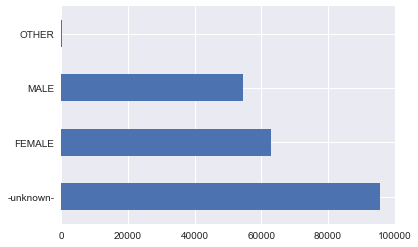

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline


train.gender.value_counts().plot(kind='barh')

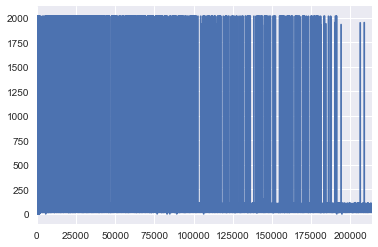

In [42]:
age = train.age
age.plot()

In [61]:
print(sum(train.age > 122))
print(sum(train.age < 18))

781
158


CLEANING DATA

In [97]:
import numpy as np
train_test.gender.replace('-unknown-', np.nan, inplace=True)

PREPROCESSING DATA

In [66]:
train_test = pd.concat((train, test), axis=0, ignore_index=True)

In [81]:
train_test = train_test.reindex_axis(train.columns, axis=1)

In [68]:
train_test.shape

(275547, 16)

In [79]:
train_test.dtypes

affiliate_channel                  object
affiliate_provider                 object
age                               float64
country_destination                object
date_account_created       datetime64[ns]
date_first_booking                 object
first_affiliate_tracked            object
first_browser                      object
first_device_type                  object
gender                             object
id                                 object
language                           object
signup_app                         object
signup_flow                         int64
signup_method                      object
timestamp_first_active              int64
dtype: object

In [82]:
train_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
train_test['date_account_created']= pd.to_datetime(train_test['date_account_created'])

In [91]:
train_test["timestamp_first_active"]=pd.to_datetime((train_test["timestamp_first_active"] // 1000000), format='%Y%m%d')

In [92]:
train_test['date_first_booking']= pd.to_datetime(train_test['date_first_booking'])

In [93]:
train_test.loc[train_test.age > 95, 'age'] = np.nan
train_test.loc[train_test.age < 13, 'age'] = np.nan

In [101]:
train_test.gender.value_counts(dropna=False)

NaN       129480
FEMALE     77524
MALE       68209
OTHER        334
Name: gender, dtype: int64

In [103]:
train_test.signup_method.value_counts(dropna=False)

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

In [104]:
train_test.signup_flow.value_counts(dropna=False)

0     206092
25     29834
12     11244
3       8822
2       6881
23      6408
24      4328
1       1047
8        315
6        301
21       197
5         36
20        14
16        11
15        10
14         4
10         2
4          1
Name: signup_flow, dtype: int64

In [107]:
train_test.language.value_counts(dropna=False)

en     265538
zh       2634
fr       1508
es       1174
ko       1116
de        977
it        633
ru        508
ja        345
pt        322
sv        176
nl        134
tr         92
da         75
pl         75
no         51
cs         49
el         30
th         28
hu         25
id         23
fi         20
ca          6
is          5
hr          2
NaN         1
Name: language, dtype: int64

In [106]:
train_test.language.replace('-unknown-', np.nan, inplace=True)

In [108]:
train_test.affiliate_channel.value_counts(dropna=False)

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

In [109]:
train_test.affiliate_provider.value_counts(dropna=False)

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

In [110]:
train_test.first_affiliate_tracked.value_counts(dropna=False)

untracked        143181
linked            62064
omg               54859
tracked-other      6655
NaN                6085
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

In [111]:
train_test.signup_app.value_counts(dropna=False)

Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

In [112]:
train_test.first_device_type.value_counts(dropna=False)

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

In [113]:
train_test.first_browser.value_counts(dropna=False)

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
RockMelt                   24
Iron                       24
IceWeasel                  14
Yandex.Browser             14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
TenFourFox                  8
Opera Mini                  8
wOSBrowser                  7
CoolNovo                    6
Avant Browser               4
Opera Mobile                4
Mozilla   

In [114]:
train_test.first_browser.replace('-unknown-', np.nan, inplace=True)

In [118]:
train_test.country_destination.value_counts(dropna=False)

NDF      124543
US        62376
NaN       62096
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [120]:
train_test.corr()

,age,signup_flow
age,1.000000,-0.114153
signup_flow,-0.114153,1.000000


In [119]:
train_test.country_destination

0           NDF
1           NDF
2            US
3         other
4            US
5            US
6            US
7            US
8            US
9            US
10           US
11          NDF
12           FR
13          NDF
14          NDF
15           CA
16          NDF
17           US
18          NDF
19           FR
20           US
21           US
22           US
23          NDF
24          NDF
25           FR
26          NDF
27           US
28           FR
29           US
          ...  
275517      NaN
275518      NaN
275519      NaN
275520      NaN
275521      NaN
275522      NaN
275523      NaN
275524      NaN
275525      NaN
275526      NaN
275527      NaN
275528      NaN
275529      NaN
275530      NaN
275531      NaN
275532      NaN
275533      NaN
275534      NaN
275535      NaN
275536      NaN
275537      NaN
275538      NaN
275539      NaN
275540      NaN
275541      NaN
275542      NaN
275543      NaN
275544      NaN
275545      NaN
275546      NaN
Name: country_destinatio

In [148]:
def calc_date_features(df):
    #date_field = ["date_account_created","timestamp_first_active","date_first_booking"]
    #date_der = {}
    for row in ["month","year", "day", "dayofweek", "quarter"]:
        df["date_accnt_created_{0}".format(row)] = getattr(df["date_account_created"].dt, row).astype('int',raise_on_error=False)
        df["timestamp_first_active_{0}".format(row)] = getattr(df["timestamp_first_active"].dt, row).astype('int',raise_on_error=False)
        df["date_first_booking_{0}".format(row)] = getattr(df["date_first_booking"].dt, row).astype('int',raise_on_error=False)
    return pd.DataFrame(df)

In [149]:
calc_date_features(train_test)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,date_accnt_created_dayofweek,timestamp_first_active_dayofweek,date_first_booking_dayofweek,date_accnt_created_quarter,timestamp_first_active_quarter,date_first_booking_quarter
0,gxn3p5htnn,2010-06-28,2009-03-19,NaT,NaN,NaN,facebook,0,en,direct,...,NaN,28,19,NaN,0,3,NaN,2,1,NaN
1,820tgsjxq7,2011-05-25,2009-05-23,NaT,MALE,38.0,facebook,0,en,seo,...,NaN,25,23,NaN,2,5,NaN,2,2,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,2010.0,28,9,2.0,1,1,0.0,3,2,3.0
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,2012.0,5,31,8.0,0,5,5.0,4,4,3.0
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,NaN,41.0,basic,0,en,direct,...,2010.0,14,8,18.0,1,1,3.0,3,4,1.0
5,osr2jwljor,2010-01-01,2010-01-01,2010-01-02,NaN,NaN,basic,0,en,other,...,2010.0,1,1,2.0,4,4,5.0,1,1,1.0
6,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,...,2010.0,2,2,5.0,5,5,1.0,1,1,1.0
7,0d01nltbrs,2010-01-03,2010-01-03,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,2010.0,3,3,13.0,6,6,2.0,1,1,1.0
8,a1vcnhxeij,2010-01-04,2010-01-04,2010-07-29,FEMALE,50.0,basic,0,en,other,...,2010.0,4,4,29.0,0,0,3.0,1,1,3.0
9,6uh8zyj2gn,2010-01-04,2010-01-04,2010-01-04,NaN,46.0,basic,0,en,other,...,2010.0,4,4,4.0,0,0,0.0,1,1,1.0


In [151]:
train_test.shape

(275547, 31)